In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os
import random 
import matplotlib.image as mpimg

In [18]:
print("Tensorflow version =",tf.__version__)
print("Pandas version =",pd.__version__)
print("Numpy version =",np.version.version)

Tensorflow version = 2.16.2
Pandas version = 2.2.2
Numpy version = 1.26.4


***Getting to know our Data***

In [71]:
def view_random_pic(target_dir,target_class):
    """Takes a target directory and a target class and displays random pictures"""
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    return img
    

['668944.jpg']


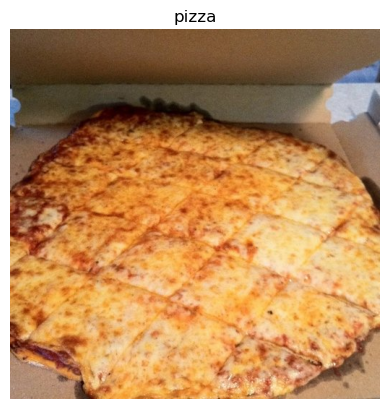

In [72]:
img = view_random_pic("/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/pizza_steak/train/","pizza")

['2425062.jpg']


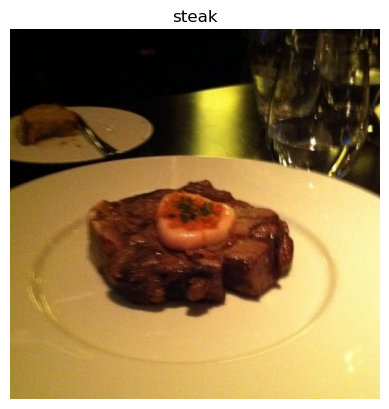

In [74]:
img = view_random_pic("/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/pizza_steak/train/","steak")

**Getting Data ready**

In [48]:
train_datagen = ImageDataGenerator(rescale=1./512,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./412,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

train_dir = "/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/pizza_steak/train"
test_dir = "/Users/veerjyotsammi/PycharmProjects/ML Playground/CNN/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(512,512),class_mode="binary",seed=42,shuffle=True)
test_data = test_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(512,512),class_mode="binary",seed=42,shuffle=True)
len(train_data),len(test_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


(47, 16)

**Actually making the model**

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,activation='relu',input_shape=(512,512,3),padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history = model.fit(train_data,
                    epochs=32,
                    validation_data=test_data)

Epoch 1/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5675 - loss: 0.6928 - val_accuracy: 0.5180 - val_loss: 0.6847
Epoch 2/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5760 - loss: 0.6835 - val_accuracy: 0.7400 - val_loss: 0.6030
Epoch 3/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6986 - loss: 0.5929 - val_accuracy: 0.7680 - val_loss: 0.5069
Epoch 4/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7628 - loss: 0.5090 - val_accuracy: 0.8160 - val_loss: 0.4637
Epoch 5/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8102 - loss: 0.4729 - val_accuracy: 0.8080 - val_loss: 0.4352
Epoch 6/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7746 - loss: 0.4772 - val_accuracy: 0.8320 - val_loss: 0.4191
Epoch 7/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7925 - loss: 0.4681 - val_accuracy: 0.8280 - val_loss: 0.3915
Epoch 8/32
47/47 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7959 - loss: 0.4584 - val_accuracy: 0.8160 - val_loss:

In [44]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 510, 510, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 508, 508, 10)   │         2,890 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 254, 254, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 252, 252, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 250, 250, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 125, 125, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 123, 123, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 121, 121, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 60, 60, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 58, 58, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 56, 56, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 28, 28, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 26, 26, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,523 (170.02 KB)

 Trainable params: 14,507 (56.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,016 (113.35 KB)

<Axes: >

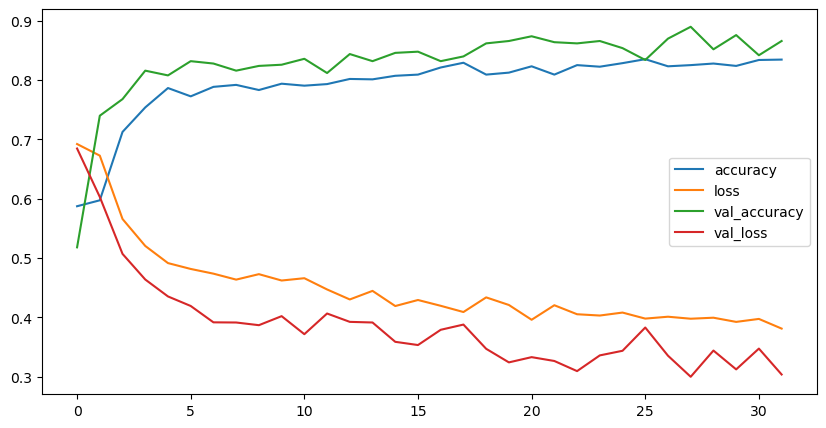

In [66]:
pd.DataFrame(history.history).plot(figsize=(10,5))

In [75]:
model.save("CNN(Binary).keras")

In [76]:
model.load_weights("CNN(Binary).keras")